Practice code based on [Menpo visualization](http://www.menpo.org/menpo/visualization.html)

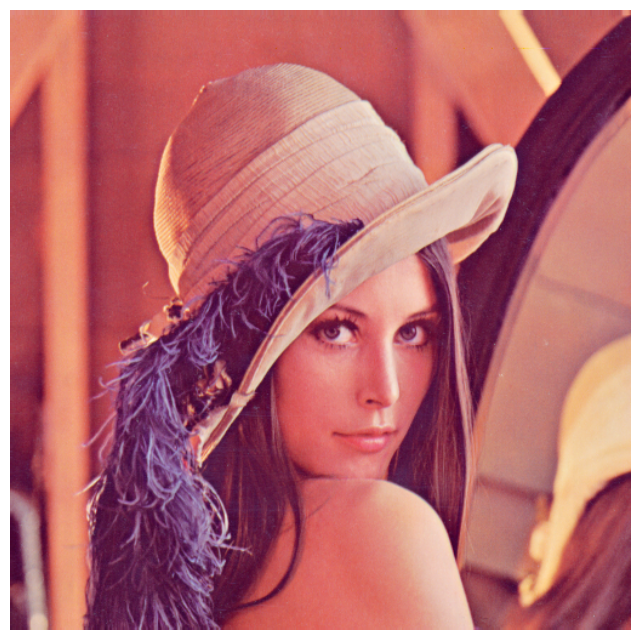

In [1]:
%matplotlib inline
import menpo.io as mio
image = mio.import_builtin_asset.lenna_png()
image.view()

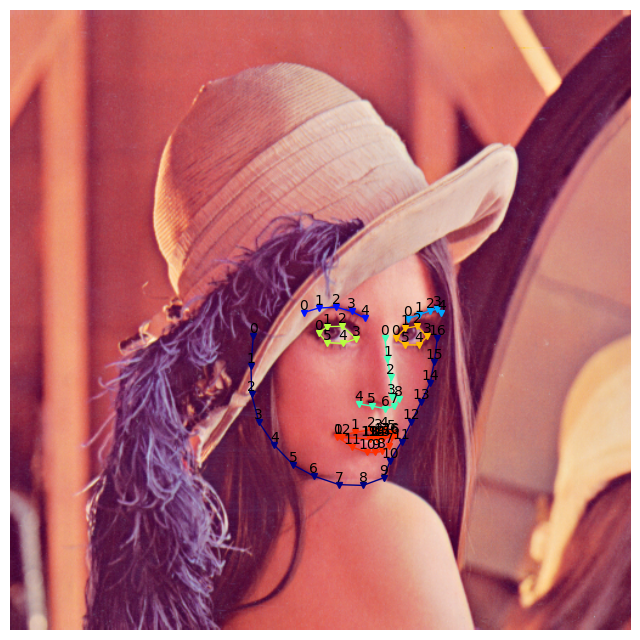

In [2]:
image.view_widget()

In [1]:
import menpo3d
mesh = menpo3d.io.import_builtin_asset('james.obj')

In [2]:
%matplotlib qt
mesh.view()

In [ ]:
print(mesh)